In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize
from graph_format import *

# Load original model

In [2]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 17min 57s
Wall time: 3min 59s
CPU times: total: 49.7 s
Wall time: 29.1 s


# Optimal retirement payments according to welfare conditioning on pension being the same

In [3]:
def objective_func(tau_values, model):
    time = np.arange(par.T)

    constant, beta1, beta2 = tau_values

    tau = np.maximum((constant + beta1*time + beta2*time**2) / 100, 0)

    theta = [tau]
    theta_names = ['tau']

    og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)

    consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= False, the_method = 'brentq')

    if np.mean(og_model.sim.s[:, 35]) >= np.mean(new_model.sim.s[:, 35]):
        print("Og is larger, value is", np.mean(og_model.sim.s[:, 35]) - np.mean(new_model.sim.s[:, 35]))

    diff = np.maximum(np.mean(og_model.sim.s[:, 35]) - np.mean(new_model.sim.s[:, 35]), 0)


    print(consumption_eq, diff, tau_values)
    return - consumption_eq + diff

tau_values_init = np.array([5.17959452e+00, 5.54957733e-01, 1.15837720e-04])

bounds  = [(0,  30), 
           (-1.0,  1.0), 
           (-0.005,  0.005)]

res = minimize(objective_func, tau_values_init, args=(model, ),  
               method='nelder-mead', 
               bounds=bounds,
               options={'maxiter': 500})

print(res.x)

Og is larger, value is 128870.07116080914
0.008803972582085807 128870.07116080914 [5.17959452e+00 5.54957733e-01 1.15837720e-04]
Og is larger, value is 88473.24940154701
0.0076044106611432944 88473.24940154701 [5.43857425e+00 5.54957733e-01 1.15837720e-04]
Og is larger, value is 65094.194267218
0.0071727371928581255 65094.194267218 [5.17959452e+00 5.82705620e-01 1.15837720e-04]
Og is larger, value is 128588.39875059249
0.008797000970912782 128588.39875059249 [5.17959452e+00 5.54957733e-01 1.21629606e-04]
Og is larger, value is 59376.29336725734
0.006912207275588956 59376.29336725734 [5.35224767e+00 5.73456324e-01 1.19698977e-04]
Og is larger, value is 24661.42625637725
0.0059850709103107845 24661.42625637725 [5.43857425e+00 5.82705620e-01 1.21629606e-04]
0.005029856230097584 0.0 [5.52490082e+00 5.91954915e-01 1.13907091e-04]
0.0031172985033279636 0.0 [5.69755397e+00 6.10453506e-01 1.10045834e-04]
0.004500619462787588 0.0 [5.32347215e+00 6.16619703e-01 1.18411892e-04]
0.0031334038527293

Gives: 0.00861496588429185 in Con EQ

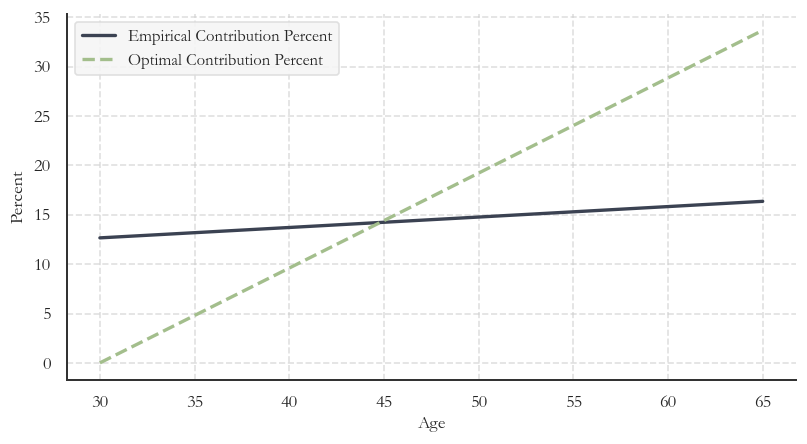

In [18]:
constant, beta1, beta2 = np.array([0.00000000e+00, 9.59572840e-01, 8.08912721e-05])
plot_tau_vs_policy(constant, beta1, beta2, par, title="", save_title="opimal_contribution.png")

# Optimal payments without restriction but with beta = 1

In [ ]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

model.par.beta = 1.0

%time model.solve(do_print=False)
%time model.simulate()


def objective_func(tau_values, model):
    time = np.arange(par.T)

    constant, beta1, beta2 = tau_values

    tau = np.maximum((constant + beta1*time + beta2*time**2) / 100, 0)

    theta = [tau]
    theta_names = ['tau']

    og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)

    consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= False, the_method = 'brentq')

    print(consumption_eq, tau_values, og_model.par.beta, new_model.par.beta)
    return - consumption_eq

tau_values_init = np.array([15.0, 0.0, 0.0])

bounds  = [(0,  30), 
           (-1.0,  1.0), 
           (-0.005,  0.005)]

res = minimize(objective_func, tau_values_init, args=(model, ),  
               method='nelder-mead', 
               bounds=bounds,
               options={'maxiter': 500})

print(res.x)

CPU times: total: 16min 8s
Wall time: 2min 8s
CPU times: total: 52.1 s
Wall time: 30.9 s
-0.001358452457379128 [15.  0.  0.] 1.0 1.0
-0.0028471822460226556 [15.75  0.    0.  ] 1.0 1.0
-0.0009209241109342358 [1.5e+01 2.5e-04 0.0e+00] 1.0 1.0
-0.0016627973671934386 [1.5e+01 0.0e+00 2.5e-04] 1.0 1.0
0.0003686947678028691 [1.42500000e+01 1.66666667e-04 1.66666667e-04] 1.0 1.0
0.002190607044684502 [1.35e+01 2.50e-04 2.50e-04] 1.0 1.0
0.0014690250578820766 [ 1.40000000e+01  3.33333333e-04 -8.33333333e-05] 1.0 1.0
0.0026492061938895154 [1.33333333e+01 5.55555556e-04 1.11111111e-04] 1.0 1.0
0.004168736625734841 [1.25000000e+01 8.33333333e-04 1.66666667e-04] 1.0 1.0
0.0055046700115806094 [1.16666667e+01 6.94444444e-04 2.22222222e-04] 1.0 1.0
0.007873386747085143 [1.00000000e+01 9.16666667e-04 3.33333333e-04] 1.0 1.0
0.007700499396661121 [1.00000000e+01 1.00000000e-03 5.83333333e-04] 1.0 1.0
0.010234736155066267 [8.16666667e+00 1.58333333e-03 4.72222222e-04] 1.0 1.0
0.011995065555657743 [5.50000

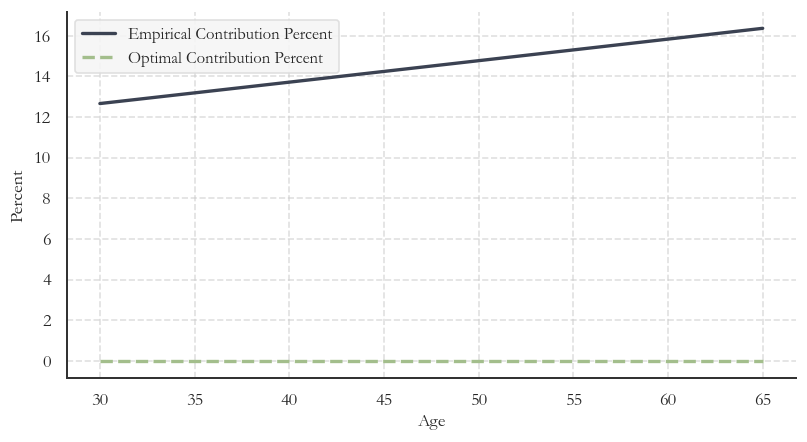

In [3]:
constant, beta1, beta2 = np.array([ 0.00000000e+00, -1.64873199e-01,  2.50981727e-05])
plot_tau_vs_policy(constant, beta1, beta2, par, title="", save_title="")